In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


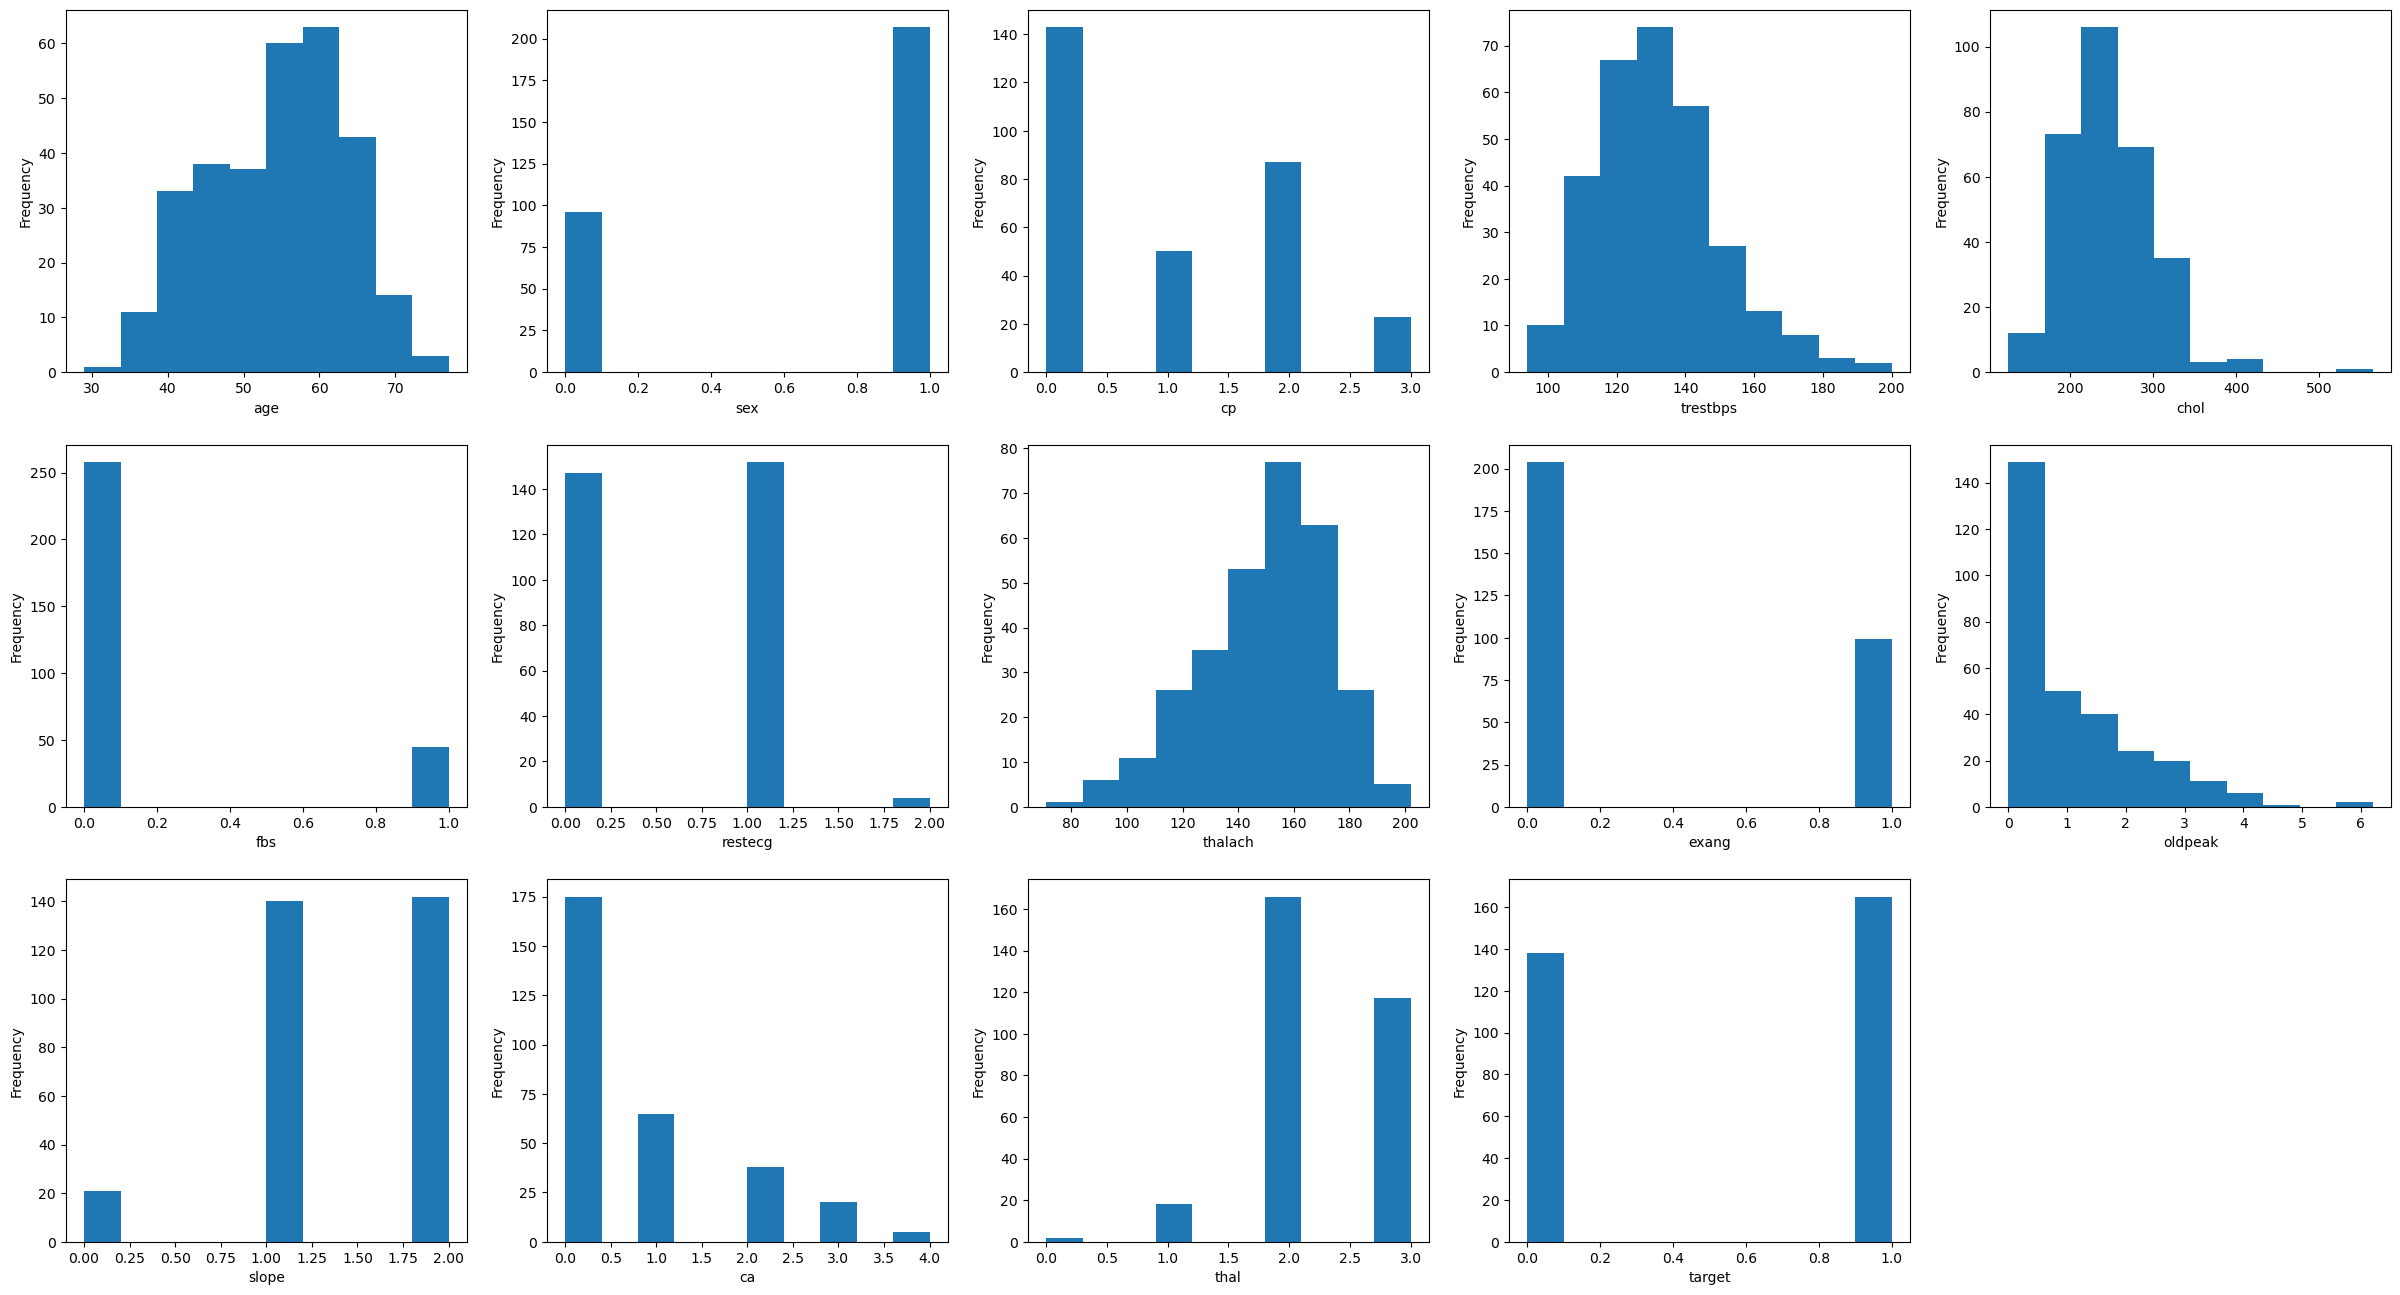

In [13]:
fig = plt.figure(figsize=(30,16))
i=0
for column in df:
    sub = fig.add_subplot(3,5,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1

In [14]:
from sklearn.model_selection  import train_test_split
from sklearn import preprocessing

X = df.drop(["target"],axis=1)
y = df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [15]:
model_pipeline=[]
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [17]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list=['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Naive Bayes']
acc_list =[]
auc_list=[]
cm_list=[]

for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr,tpr, _thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))

In [20]:
print(acc_list)
print(auc_list)
print(cm_list)

[0.9340659340659341, 0.6813186813186813, 0.6703296703296703, 0.7802197802197802, 0.8791208791208791, 0.9010989010989011]
[0.93, 0.67, 0.66, 0.78, 0.88, 0.9]
[array([[39,  4],
       [ 2, 46]], dtype=int64), array([[22, 21],
       [ 8, 40]], dtype=int64), array([[23, 20],
       [10, 38]], dtype=int64), array([[36,  7],
       [13, 35]], dtype=int64), array([[37,  6],
       [ 5, 43]], dtype=int64), array([[39,  4],
       [ 5, 43]], dtype=int64)]


In [23]:
import seaborn as sns

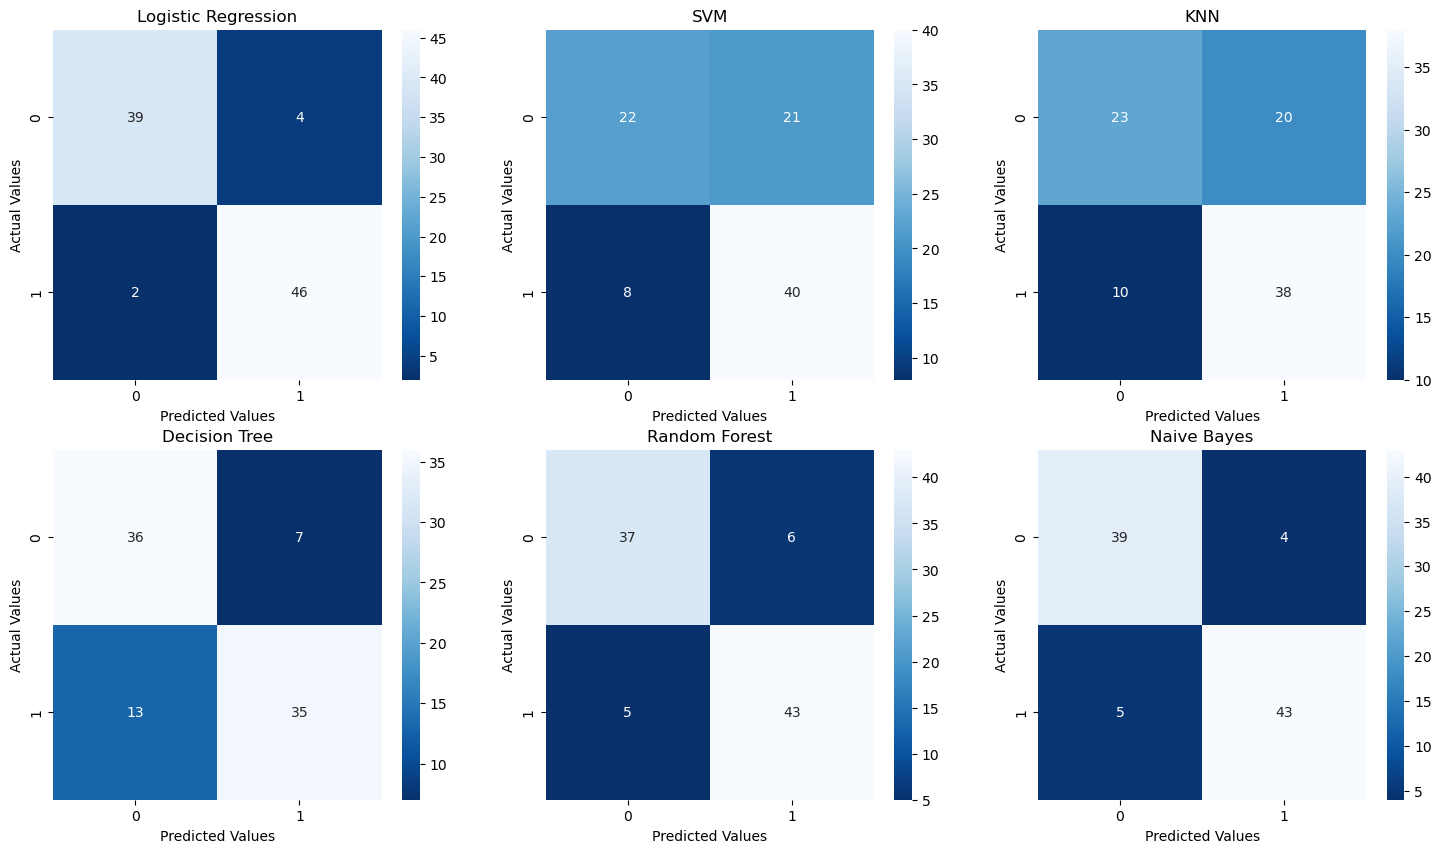

In [24]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm= cm_list[i]
    model = model_list[i]
    sub= fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm,annot=True,cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [25]:
result_df=pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.934066,0.93
1,SVM,0.681319,0.67
2,KNN,0.670330,0.66
3,Decision Tree,0.780220,0.78
4,Random Forest,0.879121,0.88
5,Naive Bayes,0.901099,0.90
